# Predictions Based on Second Year Data

## Dependencies

In [2]:
using DataFrames, DataArrays, Gadfly, Distributions, GLM

In [3]:
set_default_plot_size(985px, 400px);

## Preparing the Data

This data contains all years up to 2014

In [4]:
data = readtable("begfresh2.csv");

Load students that were admitted after 2005 and before 2015.

In [5]:
data = data[data[:ENTRYSEM] .>= 20063, :];

Transform entry year column (ex 20063 to 2006).

In [6]:
data[:ENTRYSEM] .-= 3;
data[:ENTRYSEM] ./= 10;

Convert NA values to 0

In [7]:
data[isna(data[:CUMGPA04]), :CUMGPA04] = 0;
data[isna(data[:CUMHRS04]), :CUMHRS04] = 0;
data[isna(data[:GRAD4]), :GRAD4] = 0;
data[isna(data[:GRAD5]), :GRAD5] = 0;
data[isna(data[:GRAD6]), :GRAD6] = 0;

Number of students:

In [8]:
students = size(data)[1]

32139

## Four Year Graduation Rate

### Training the Probit Model

Using the GLM package, a probit model is trained to give the probability that a student will graduate within four years. The following features are used in this model:
- Whether the student is male
- Whether the student is American Indian
- Fourth semester GPA
- Number of credit hours after the second semester

In [9]:
training_4year = data[data[:ENTRYSEM] .<= 2011, :];

In [10]:
gradmodel_4years = glm(GRAD4 ~ MALE + AM_INDIAN + CUMGPA04 + CUMHRS04, training_4year, Binomial(), ProbitLink())

DataFrames.DataFrameRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Distributions.Binomial,GLM.ProbitLink},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Float64}:

Coefficients:
               Estimate  Std.Error  z value Pr(>|z|)
(Intercept)    -7.23468   0.132619 -54.5522   <1e-99
MALE         -0.0937001   0.028037 -3.34201   0.0008
AM_INDIAN     -0.279107  0.0835781 -3.33947   0.0008
CUMGPA04        1.07827  0.0321489    33.54   <1e-99
CUMHRS04      0.0515831 0.00172902  29.8338   <1e-99


### Make Predictions Using the Training Model

In [24]:
year = 2006;
years = [];
actual_4year = [];
predicted_4year = [];

for i=1:8
    X = data[data[:ENTRYSEM] .== year, :]
    probs = predict(gradmodel_4years, X)
    push!(predicted_4year, mean(probs)*100)
    year <= 2010 ? push!(actual_4year, mean(X[:GRAD4])*100) : nothing
    push!(years, year)
    year += 1
end

#### RMSE

In [25]:
rmse = sqrt(sum((predicted_4year[1:5]-actual_4year).^2)) / 5

0.5395420010474454

#### Plot

In [26]:
theme_predicted = Theme(default_color=colorant"red")
layer_predicted_4year = layer(x=years, y=predicted_4year, Geom.point, Geom.line, theme_predicted);

In [27]:
theme_actual = Theme(default_color=colorant"blue")
layer_actual_4year = layer(x=years[1:5], y=actual_4year, Geom.point, Geom.line, theme_actual);

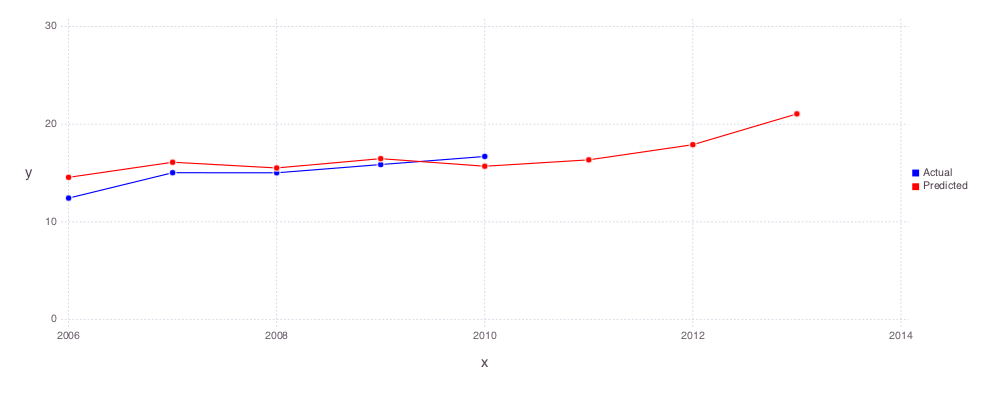

In [28]:
plot(layer_predicted_4year, layer_actual_4year, Coord.Cartesian(ymin=0,ymax=30), 
Guide.manual_color_key("", ["Actual", "Predicted"], ["blue", "red"]))

## Five Year Graduation Rate

### Training the Probit Model

Using the GLM package, a probit model is trained to give the probability that a student will graduate within four years. The following features are used in this model:
- Whether the student is male
- Whether the student is American Indian
- Fourth semester GPA
- Number of credit hours after the second semester
- Number of major changes

In [29]:
training_5year = data[data[:ENTRYSEM] .<= 2010, :];

In [30]:
gradmodel_5years = glm(GRAD5 ~ MALE + AM_INDIAN + CUMGPA04 + CUMHRS04 + CHANGE_2, training_5year, Binomial(), ProbitLink())

DataFrames.DataFrameRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Distributions.Binomial,GLM.ProbitLink},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Float64}:

Coefficients:
              Estimate  Std.Error  z value Pr(>|z|)
(Intercept)   -6.20186   0.104235 -59.4988   <1e-99
MALE         -0.152552  0.0265387 -5.74828    <1e-8
AM_INDIAN    -0.269748  0.0669666  -4.0281    <1e-4
CUMGPA04       1.09558  0.0274837   39.863   <1e-99
CUMHRS04     0.0518092 0.00129102  40.1304   <1e-99
CHANGE_2      0.149048  0.0266675  5.58913    <1e-7


### Make Predictions Using the Training Model

In [36]:
year = 2006;
years = [];
actual_5year = [];
predicted_5year = [];

for i=1:8
    X = data[data[:ENTRYSEM] .== year, :]
    probs = predict(gradmodel_5years, X)
    push!(predicted_5year, mean(probs)*100)
    year <= 2009 ? push!(actual_5year, mean(X[:GRAD5])*100) : nothing
    push!(years, year)
    year += 1
end

#### RMSE

In [37]:
rmse = sqrt(sum((predicted_5year[1:4]-actual_5year).^2)) / 4

0.21490239232724254

#### Plot

In [38]:
theme_predicted = Theme(default_color=colorant"red")
layer_predicted_5year = layer(x=years, y=predicted_5year, Geom.point, Geom.line, theme_predicted);

In [39]:
theme_actual = Theme(default_color=colorant"blue")
layer_actual_5year = layer(x=years[1:4], y=actual_5year, Geom.point, Geom.line, theme_actual);

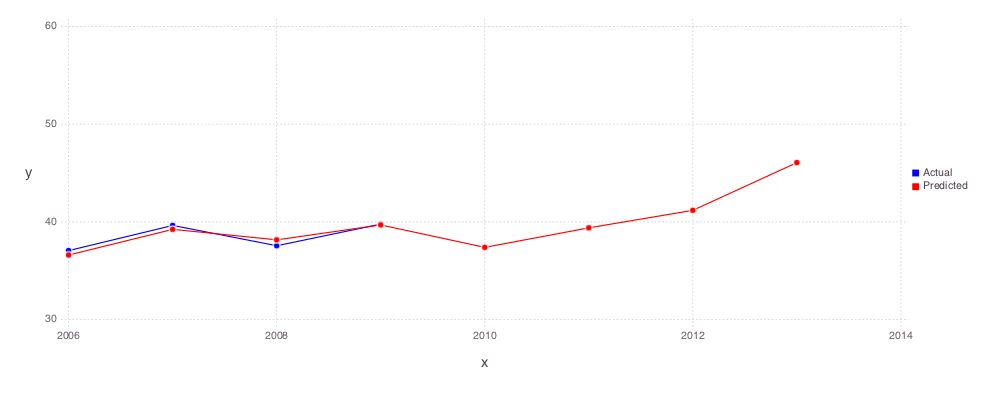

In [40]:
plot(layer_predicted_5year, layer_actual_5year, Coord.Cartesian(ymin=30,ymax=60), 
Guide.manual_color_key("", ["Actual", "Predicted"], ["blue", "red"]))

## Six Year Graduation Rate

### Training the Probit Model

Using the GLM package, a probit model is trained to give the probability that a student will graduate within four years. The following features are used in this model:
- ACTCOMPSQ
- Whether the student is American Indian
- Fourth semester GPA
- Number of credit hours after the fourth semester
- Number of major changes
- FIVE_YR2

In [42]:
training_6year = data[data[:ENTRYSEM] .<= 2009, :];
# training_6year = training_6year[!isna(training_6year[:FIVE_YR1]), :];

In [43]:
gradmodel_6years = glm(GRAD6 ~ ACTCOMPSQ + AM_INDIAN + CUMGPA04 + CUMHRS04 + CHANGE_2 + FIVE_YR2, training_6year, Binomial(), ProbitLink())

DataFrames.DataFrameRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Distributions.Binomial,GLM.ProbitLink},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Float64}:

Coefficients:
                 Estimate  Std.Error  z value Pr(>|z|)
(Intercept)         -3.23    0.17547 -18.4077   <1e-74
ACTCOMPSQ    -0.000520529 8.85196e-5 -5.88039    <1e-8
AM_INDIAN       -0.227794  0.0682126 -3.33948   0.0008
CUMGPA04         0.502539  0.0487673  10.3048   <1e-24
CUMHRS04        0.0260333 0.00218444  11.9176   <1e-32
CHANGE_2         0.139303  0.0308979  4.50851    <1e-5
FIVE_YR2           1.7469   0.151047  11.5653   <1e-30


### Make Predictions Using the Training Model

In [46]:
year = 2006;
years = [];
actual_6year = [];
predicted_6year = [];

for i=1:8
    X = data[data[:ENTRYSEM] .== year, :]
    X = X[!isna(X[:FIVE_YR2]), :]
    probs = predict(gradmodel_6years, X)
    push!(predicted_6year, mean(probs)*100)
    year <= 2008 ? push!(actual_6year, mean(X[:GRAD6])*100) : nothing
    push!(years, year)
    year += 1
end

#### RMSE

In [47]:
rmse = sqrt(sum((predicted_6year[1:3]-actual_6year).^2)) / 3

0.06779712853985274

#### Plot

In [52]:
theme_predicted = Theme(default_color=colorant"red")
layer_predicted_6year = layer(x=years, y=predicted_6year, Geom.point, Geom.line, theme_predicted);

In [53]:
theme_actual = Theme(default_color=colorant"blue")
layer_actual_6year = layer(x=years[1:3], y=actual_6year, Geom.point, Geom.line, theme_actual);

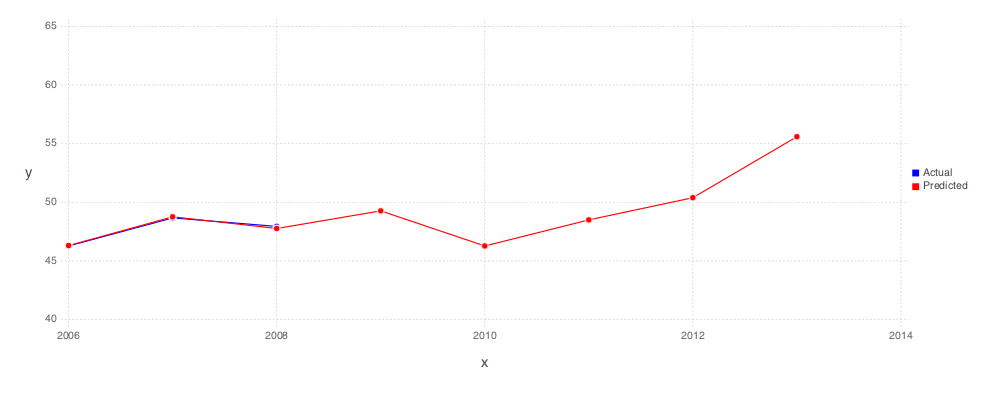

In [54]:
plot(layer_predicted_6year, layer_actual_6year, Coord.Cartesian(ymin=40,ymax=65), 
Guide.manual_color_key("", ["Actual", "Predicted"], ["blue", "red"]))